In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from denn import *

In [2]:
experiment = 2
func = 'rastrigin'
out_best = f'exp{experiment}_{func}.npy'
path = Path(f'../../data/results2/exp{experiment}/{func}')

In [3]:
# funcs
if func=='sphere':
    if experiment==1 or experiment==2:
        ab = pd.read_csv(path/'dC_01.csv')['b'].values
        def fitness_func(indiv, b, t): return (indiv.data**2).sum()
        def constraint_func(indiv, b, t): return -b[t] + sum((1/np.sqrt(D))*indiv.data)

    elif experiment==3:
        ab=[]
        # experiment 3: dynamic fitness function (linear)
        def fitness_func(indiv, b, t): return ((indiv.data +0.1*t)**2).sum()
        def constraint_func(indiv, b, t): return 0

    else:
        ab=pd.read_csv(path/'dC_01.csv')['b'].values
    # experiment 5: dynamic fitness function (x-sin(pi/2*t))^2 with random changes on peak of sin
        def fitness_func(indiv, b, t): return ((indiv.data-b[t]*np.sin(np.pi/2*t))**2).sum()
        def constraint_func(indiv, b, t): return 0
    
elif func=='rastrigin':
    if experiment==1 or experiment==2:
        ab = pd.read_csv(path/'dC_01.csv')['b'].values
        def fitness_func(indiv, b, t): return 10*D+((indiv.data**2)-10*np.cos(2*np.pi*indiv.data)).sum()
        def constraint_func(indiv, b, t): return -b[t] + sum((1/np.sqrt(D))*indiv.data)

    elif experiment==3:
        ab=[]
        # experiment 3: dynamic fitness function (linear)
        def fitness_func(indiv, b, t): return 10*D+(((indiv.data+0.1*t)**2)-10*np.cos(2*np.pi*indiv.data)).sum()
        def constraint_func(indiv, b, t): return 0

    else:
        ab=pd.read_csv(path/'dC_01.csv')['b'].values
    # experiment 5: dynamic fitness function (x-sin(pi/2*t))^2 with random changes on peak of sin
        def fitness_func(indiv, b, t): return 10*D+(((indiv.data-b[t]*np.sin(np.pi/2*t))**2)-10*np.cos(2*np.pi*indiv.data)).sum()
        def constraint_func(indiv, b, t): return 0

elif func=='rosenbrock':
    if experiment==1 or experiment==2:
        ab = pd.read_csv(path/'dC_01.csv')['b'].values
        def fitness_func(indiv, b, t): return ((100 * (indiv.data[1:] - indiv.data[:-1]**2)**2) + (1-indiv.data[:-1])**2).sum()
        def constraint_func(indiv, b, t): return -b[t] + sum((1/np.sqrt(D))*indiv.data)

    elif experiment==3:
        ab=[]
        # experiment 3: dynamic fitness function (linear)
        def fitness_func(indiv, b, t): return (100 * (((indiv.data[1:]+0.1*t) - (indiv.data[:-1]+0.1*t)**2)**2) + (1-indiv.data[:-1]-0.1*t)**2).sum()
        def constraint_func(indiv, b, t): return 0

    else:
        ab=pd.read_csv(path/'dC_01.csv')['b'].values
    # experiment 5: dynamic fitness function (x-sin(pi/2*t))^2 with random changes on peak of sin
        def fitness_func(indiv, b, t): return (((100 * ((indiv.data[1:]-b[t]*np.sin(np.pi/2*t)) - (indiv.data[:-1]-b[t]*np.sin(np.pi/2*t))**2)**2) + (1-indiv.data[:-1]+b[t]*np.sin(np.pi/2*t))**2)).sum()
        def constraint_func(indiv, b, t): return 0

In [4]:
D = 2
def fitness_func(indiv, b, t): return (indiv.data**2).sum()
def constraint_func(indiv, b, t): return -b[t] + sum((1/np.sqrt(D))*indiv.data)
population = Population.new_random(n=30, dimension=D)

opt = Optimization(population, fitness_func, constraint_func, constraint_params=[ab],
                   max_times=100, frequency=0.05, callbacks=[Logger,RandomImmigrantsOnChange],
                   path='test_logger')
opt.state_dict

{'gen': 0, 'evals': 0, 'time': 0, 'time_evals': 0, 'best': None}

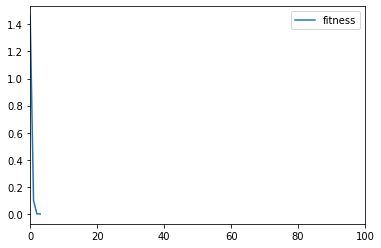

Total time: 01:04


BdbQuit: 

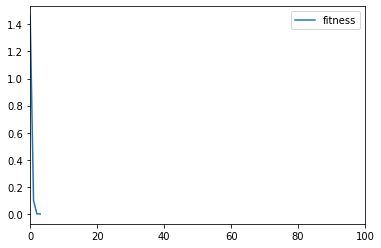

In [5]:
opt.run(100000)
opt.recorder.plot()

In [6]:
opt.logger

Logger(path='test_logger/logger.json')

In [7]:
!cp {opt.logger.path} /home/renato/github/show_evolution/src/data/ea_data.json